In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
import json
from pathlib import Path
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="darkgrid")

logdir = Path("/bigdata/cifar10/logs/garipov/dbs/")

In [ ]:
import os

folders = os.listdir(logdir)
print(f"number of folders: {len(folders)}")

number of folders: 14


In [ ]:
from tddl.post_processing.path_utils import logdir_to_paths

paths = logdir_to_paths(logdir)

print(len(paths))

5


In [ ]:
# baseline

baseline_path = Path("/bigdata/cifar10/logs/garipov/baselines/1647358615/gar_18_dNone_128_sgd_l0.1_g0.1_w0.0_sTrue")
# baseline_model = torch.load(baseline_path / "cnn_best.pth")
with open(baseline_path/'results.json') as json_file:
    baseline_result = json.load(json_file)
baseline_result

{'best_epoch': 38,
 'best_train_acc': 0.9749333333333333,
 'best_valid_acc': 0.9078,
 'best_valid_loss': 0.003568341651931405,
 'test_acc': 0.891,
 'test_loss': 0.004007616302371025,
 'n_param': 557642,
 'model_name': 'gar_18_dNone_128_sgd_l0.1_g0.1_w0.0_sTrue'}

In [ ]:
from tddl.post_processing.post_dbs import process_factorized_networks

process_factorized_networks(paths, baseline_path)

In [ ]:
from tddl.post_processing.path_utils import paths_to_df

df = paths_to_df(paths, filename='results_dbs.json', dbs=True)
df['compression'] = 'dbs'
df

,name,nr,layers,factorization,rank,valid_acc,valid_acc_before_ft,test_acc_before_ft,n_param_fact,test_acc,lr,optimizer,baseline_parameters,fact_parameters,compression_ratio,compression
0,[],[],"[2, 4, 6, 8, 10]",tucker,0.10,0.8202,0.3504,0.3384,63279,0.8102,0.0001,sgd,557642,63279,0.113476,dbs
1,[],[],"[2, 4, 6, 8, 10]",tucker,0.75,0.9040,0.8984,0.8853,426342,0.8906,0.0001,sgd,557642,426342,0.764544,dbs
2,[],[],"[2, 4, 6, 8, 10]",tucker,0.90,0.9016,0.8992,0.8874,507466,0.8904,0.0001,sgd,557642,507466,0.910021,dbs
3,[],[],"[2, 4, 6, 8, 10]",tucker,0.25,0.8778,0.8150,0.8042,144777,0.8726,0.0001,sgd,557642,144777,0.259624,dbs
4,[],[],"[2, 4, 6, 8, 10]",tucker,0.50,0.8946,0.8784,0.8717,283581,0.8837,0.0001,sgd,557642,283581,0.508536,dbs


In [ ]:
logdir_constant = Path("/bigdata/cifar10/logs/garipov/constant/")
folders_constant = os.listdir(logdir_constant)
paths_constant = logdir_to_paths(logdir_constant)

process_factorized_networks(paths_constant, baseline_path)

df_constant = paths_to_df(paths_constant, filename='results_dbs.json', dbs=True)
df_constant['compression'] = 'constant'
df_constant

,name,nr,layers,factorization,rank,valid_acc,valid_acc_before_ft,test_acc_before_ft,n_param_fact,test_acc,lr,optimizer,baseline_parameters,fact_parameters,compression_ratio,compression
0,[],[],"[2, 4, 6, 8, 10]",tucker,0.75,0.8984,0.8930,0.8808,422027,0.8873,0.0001,sgd,557642,422027,0.756806,constant
1,[],[],"[2, 4, 6, 8, 10]",tucker,0.25,0.8694,0.7736,0.7626,141971,0.8665,0.0001,sgd,557642,141971,0.254592,constant
2,[],[],"[2, 4, 6, 8, 10]",tucker,0.10,0.8138,0.3284,0.3196,60509,0.8050,0.0001,sgd,557642,60509,0.108509,constant
3,[],[],"[2, 4, 6, 8, 10]",tucker,0.50,0.8882,0.8676,0.8573,279154,0.8831,0.0001,sgd,557642,279154,0.500597,constant
4,[],[],"[2, 4, 6, 8, 10]",tucker,0.90,0.9036,0.8982,0.8861,501708,0.8891,0.0001,sgd,557642,501708,0.899696,constant


In [ ]:
df = df.append(df_constant, ignore_index=True)
df

,name,nr,layers,factorization,rank,valid_acc,valid_acc_before_ft,test_acc_before_ft,n_param_fact,test_acc,lr,optimizer,baseline_parameters,fact_parameters,compression_ratio,compression
0,[],[],"[2, 4, 6, 8, 10]",tucker,0.10,0.8202,0.3504,0.3384,63279,0.8102,0.0001,sgd,557642,63279,0.113476,dbs
1,[],[],"[2, 4, 6, 8, 10]",tucker,0.75,0.9040,0.8984,0.8853,426342,0.8906,0.0001,sgd,557642,426342,0.764544,dbs
2,[],[],"[2, 4, 6, 8, 10]",tucker,0.90,0.9016,0.8992,0.8874,507466,0.8904,0.0001,sgd,557642,507466,0.910021,dbs
3,[],[],"[2, 4, 6, 8, 10]",tucker,0.25,0.8778,0.8150,0.8042,144777,0.8726,0.0001,sgd,557642,144777,0.259624,dbs
4,[],[],"[2, 4, 6, 8, 10]",tucker,0.50,0.8946,0.8784,0.8717,283581,0.8837,0.0001,sgd,557642,283581,0.508536,dbs
5,[],[],"[2, 4, 6, 8, 10]",tucker,0.75,0.8984,0.8930,0.8808,422027,0.8873,0.0001,sgd,557642,422027,0.756806,constant
6,[],[],"[2, 4, 6, 8, 10]",tucker,0.25,0.8694,0.7736,0.7626,141971,0.8665,0.0001,sgd,557642,141971,0.254592,constant
7,[],[],"[2, 4, 6, 8, 10]",tucker,0.10,0.8138,0.3284,0.3196,60509,0.8050,0.0001,sgd,557642,60509,0.108509,constant
8,[],[],"[2, 4, 6, 8, 10]",tucker,0.50,0.8882,0.8676,0.8573,279154,0.8831,0.0001,sgd,557642,279154,0.500597,constant
9,[],[],"[2, 4, 6, 8, 10]",tucker,0.90,0.9036,0.8982,0.8861,501708,0.8891,0.0001,sgd,557642,501708,0.899696,constant


In [ ]:
# df['rank'] = df['rank'].astype(float, copy=False)
# df['fact_rank'] = df['factorization'] + '-' + df['rank'].apply(str)
# df['fact_layers'] = df['factorization'] + '-' + df['layers'].apply(str)
# df['layers_fact'] = df['layers'].apply(str) + '-' + df['factorization'] 
# df.head()

In [ ]:
df['test_error_before_ft'] = 1 - df.test_acc_before_ft
df['test_error'] = 1 - df.test_acc
df['valid_error_before_ft'] = 1 - df.valid_acc_before_ft
df['valid_error'] = 1 - df.valid_acc

df['log_test_error_before_ft'] = np.log(df.test_error_before_ft)
df['log_test_error'] = np.log(df.test_error)
df['log_valid_error_before_ft'] = np.log(df.valid_error_before_ft)
df['log_valid_error'] = np.log(df.valid_error)

In [ ]:
# df = df.astype({
#     'layers':"category",
#     'fact_layers':"category",
#     'layers_fact':"category",
# })

KeyError: 'Only a column name can be used for the key in a dtype mappings argument.'

# plots

In [ ]:
import seaborn as sns
sns.set_theme()

In [ ]:
df.columns

Index(['name', 'nr', 'layers', 'factorization', 'rank', 'valid_acc',
       'valid_acc_before_ft', 'test_acc_before_ft', 'n_param_fact', 'test_acc',
       'lr', 'optimizer', 'baseline_parameters', 'fact_parameters',
       'compression_ratio', 'compression', 'test_error_before_ft',
       'test_error', 'valid_error_before_ft', 'valid_error',
       'log_test_error_before_ft', 'log_test_error',
       'log_valid_error_before_ft', 'log_valid_error'],
      dtype='object')

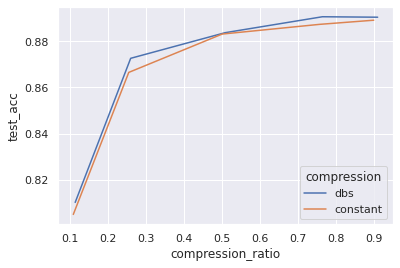

In [ ]:
f = sns.lineplot(data=df, x='compression_ratio', y='test_acc', hue='compression')
f.get_figure().savefig('../../plots/gar_c10_dbs_after_ft.pdf')

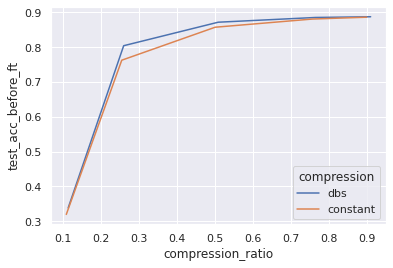

In [ ]:
f = sns.lineplot(data=df, x='compression_ratio', y='test_acc_before_ft', hue='compression')
f.get_figure().savefig('../../plots/gar_c10_dbs_before_ft.pdf')

In [ ]:
'test_acc': 0.891